In [1]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:

# df_TagDesc = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\Not for Processing\TagDesc.csv')

# df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
# df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# # Concatenate (union) the dataframes
# df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

df_All = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\3 Feature Selection\filtered-out_5-9_corr.csv')

print(df_All.head())


                  Date  425_pct_Al     Al2O3  M_Value  C4_pct_Eth  C4_pct_H2O  \
0  2012-05-17 09:00:00    6.319560  11.41670  3.50773    2.554580     22.0531   
1  2012-05-17 10:00:00    6.319915  11.40835  3.50797    2.555935     22.0557   
2  2012-05-17 12:00:00    6.320970  11.39165  3.50869    2.560005     22.0636   
3  2012-05-18 08:00:00    6.328690  11.39165  3.51401    2.540370     22.0604   
4  2012-05-18 09:00:00    6.336060  11.40500  3.51910    2.514430     22.0484   

   HydWtr_pct_Ammonia  C4_pct_Hex  HydWtr_Na2O  Butanol  ...    LC90366  \
0            0.867508    0.670721     3.354160  30.3662  ...  15.449150   
1            0.864729    0.671059     3.306475  30.3662  ...  15.449150   
2            0.856391    0.672071     3.163420  30.6785  ...  15.449150   
3            0.811652    0.674174     2.238130  32.6454  ...   8.759814   
4            0.773793    0.675408     1.391475  32.6454  ...   8.759814   

    LC90368   PI55004   PI55020   TC55552   TC55553   TC55555 

### Include

In [3]:
# selected_columns = ['Butanol', 
#                     'FC55569',
#                     'DI55152',
#                     '425 %Al',
#                     'TC55552',
#                     'FC55003',
#                     'LC55555',
#                     'FFC55553',
#                     'FFC55555',
#                     'TC55555',
#                     'TI55021',
#                     'PI55004',
#                     'FC55552'
#                     ]
# existing_columns = [col for col in selected_columns if col in df_All.columns]
# df_All = df_All[existing_columns]

# print(df_All.head())

In [4]:
# Set max columns to display
pd.set_option('display.max_columns', None)

### Exlcude

In [5]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = [
                     'Date', 
                     'LC55553',
                     'TC55555',
                     'PI55020',
                     'TC55553',
                     'TI55021',
                     'LC55553',
                     'LC55568',
                     'TI40050',
                     'TI55023',
                     'PI55004',
                     'M_Value',
                     'FFC55553',
                     'DI55580',
                     'Al2O3',
                     'C4_pct_Hex',
                     'LC52572'

            #      'C4_pct_Hex', 'HydWtr_Na2O',
            #       # No improvement after dropping:
            #      'TC55555'
            #    #   MSE Train	RMSE Train	R2 Train	MSE Test	RMSE Test	R2 Test
            #    #   7.935280	2.8169630	0.90869	12.1856	3.490801	   0.8677
                   
                   ]

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [6]:
df_All.columns

Index(['425_pct_Al', 'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia',
       'HydWtr_Na2O', 'Butanol', 'DI55102', 'DI55152', 'FC55003', 'FC55552',
       'FC55569', 'FC55576', 'FFC55555', 'LC55557', 'LC90366', 'LC90368',
       'TC55552'],
      dtype='object')

In [7]:
# df_All = df_All[df_All['Date'] > '2020-06-15 00:00:00']

In [8]:
# df_All.drop('Date', axis=1, inplace=True)

In [9]:
print(df_All.describe())

         425_pct_Al    C4_pct_Eth    C4_pct_H2O  HydWtr_pct_Ammonia  \
count  40127.000000  40127.000000  40127.000000        40127.000000   
mean       6.133716      1.213887     21.178645            0.967938   
std        0.228800      0.691779      2.750323            0.146452   
min        5.270185      0.030786      7.714985            0.374388   
25%        6.003510      0.621701     18.843125            0.877260   
50%        6.135865      1.103350     21.462900            0.939660   
75%        6.265830      1.687807     23.275925            1.028358   
max        7.026215      9.466675     34.151950            1.615295   

        HydWtr_Na2O       Butanol       DI55102       DI55152       FC55003  \
count  40127.000000  40127.000000  40127.000000  40127.000000  40127.000000   
mean       0.789919      9.218873      0.944657      0.932500   5994.093426   
std        0.686560      8.828021      0.051564      0.028840    742.541657   
min        0.002854      0.361524      0.800

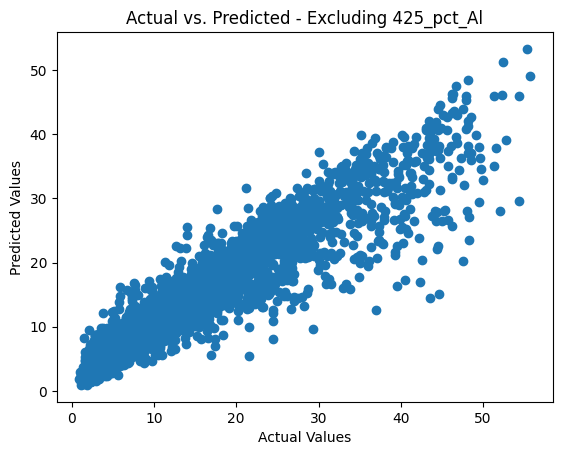

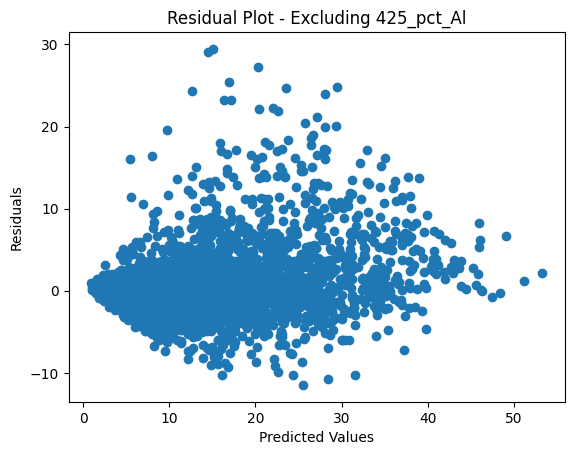

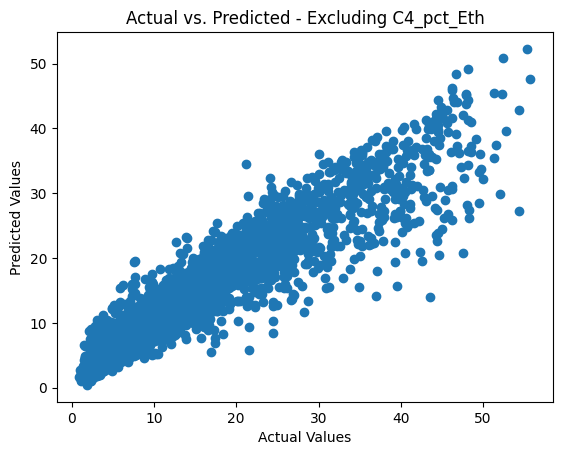

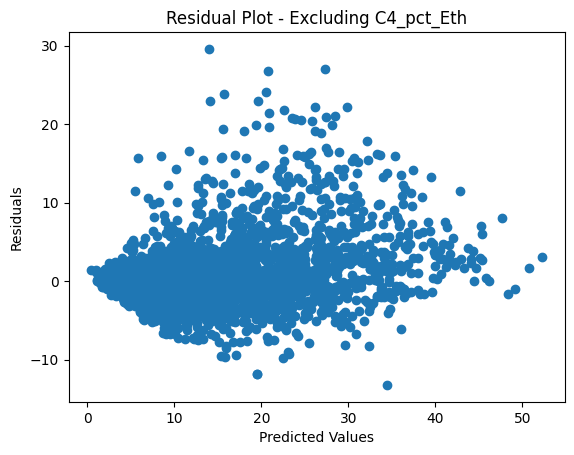

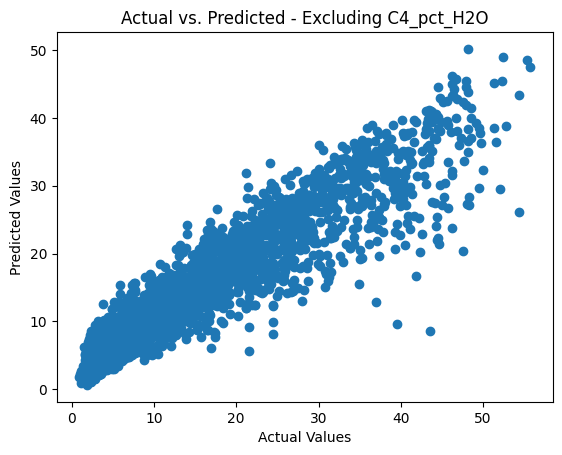

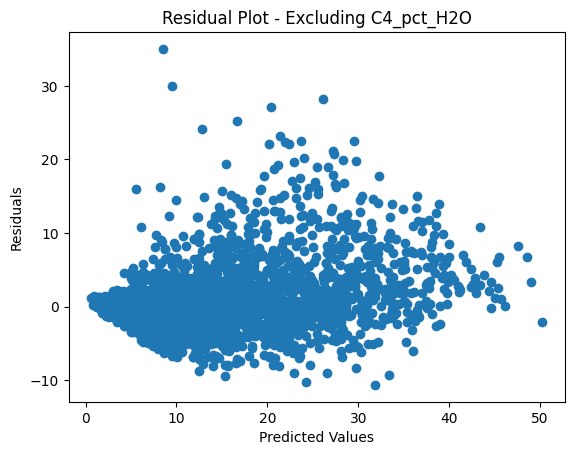

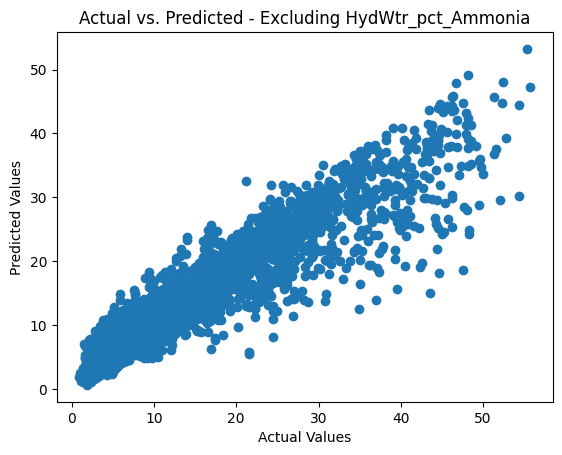

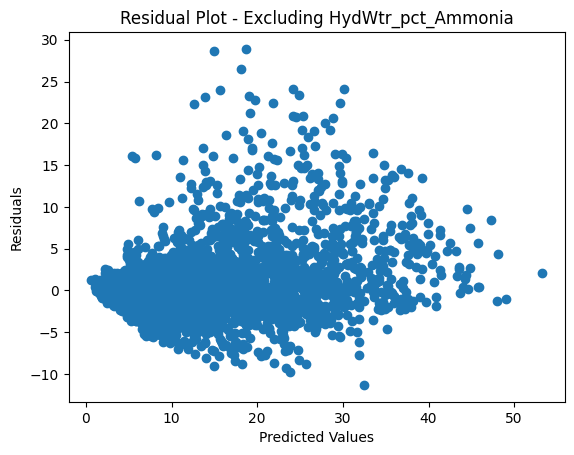

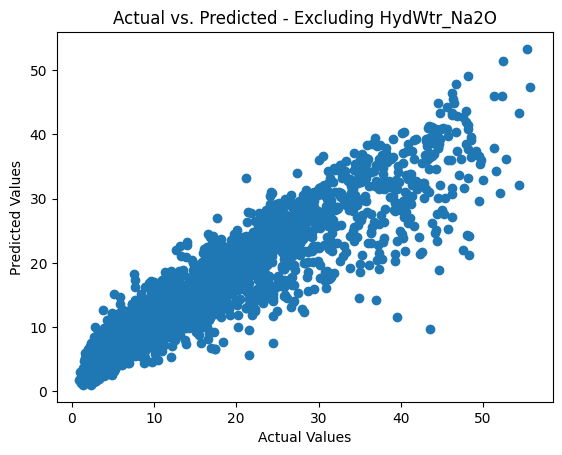

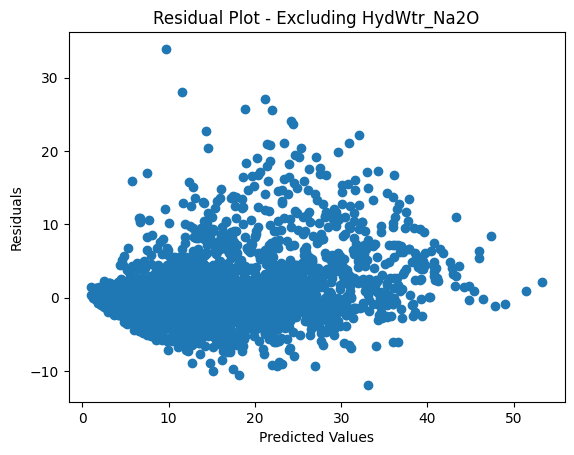

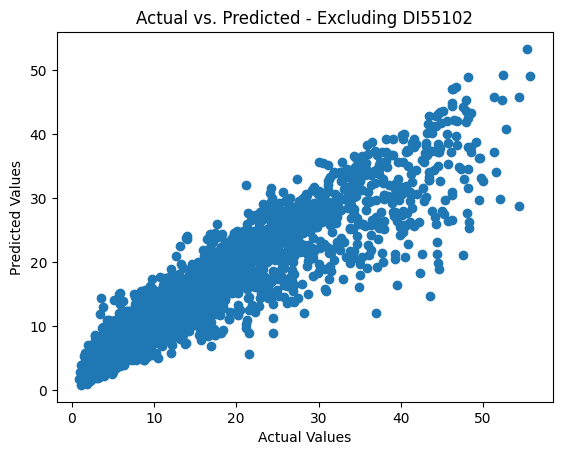

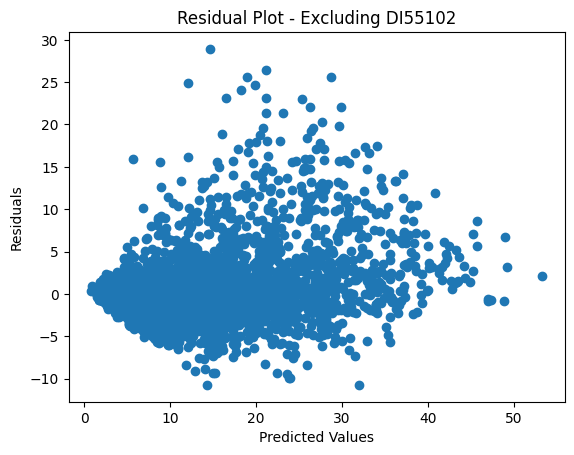

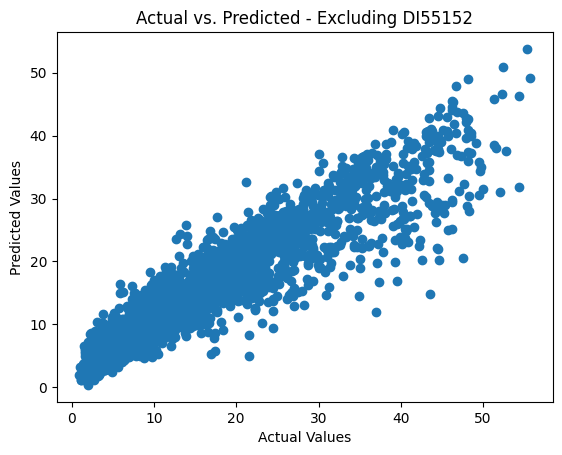

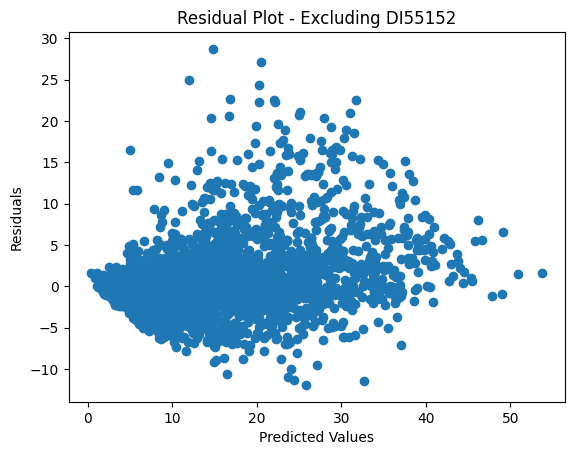

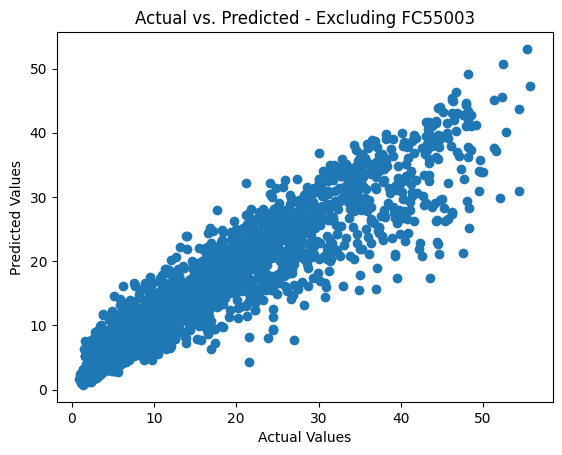

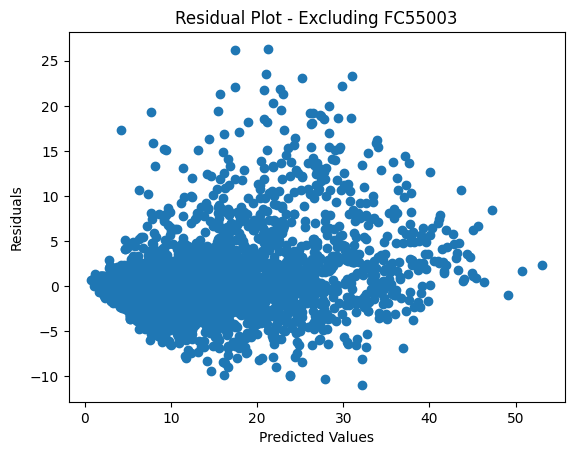

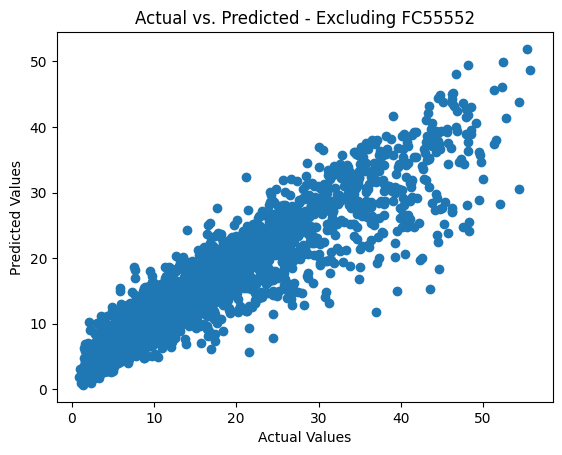

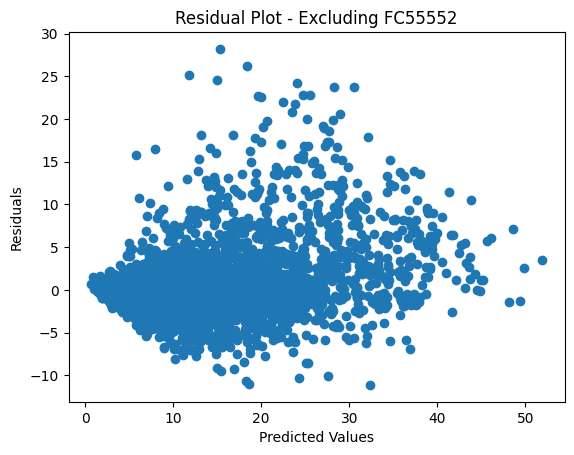

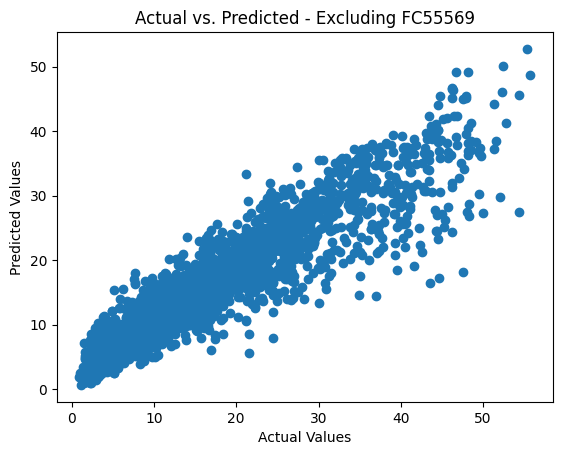

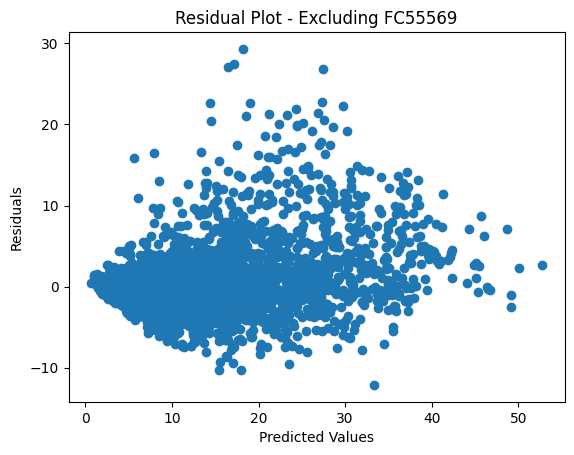

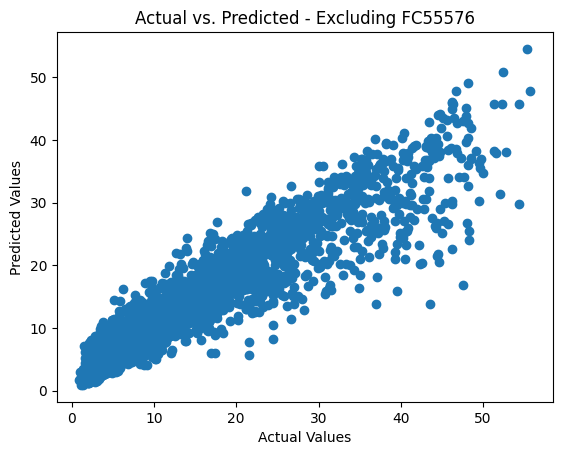

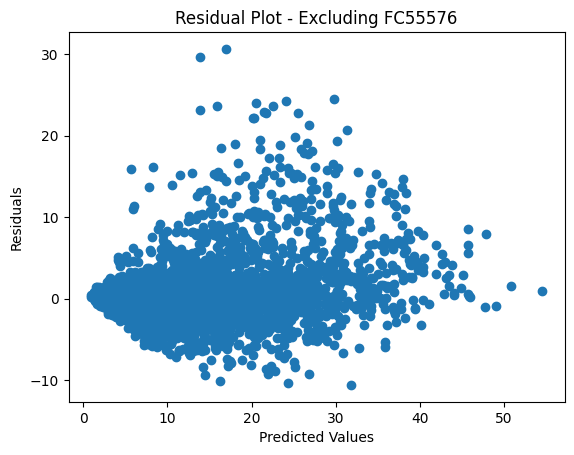

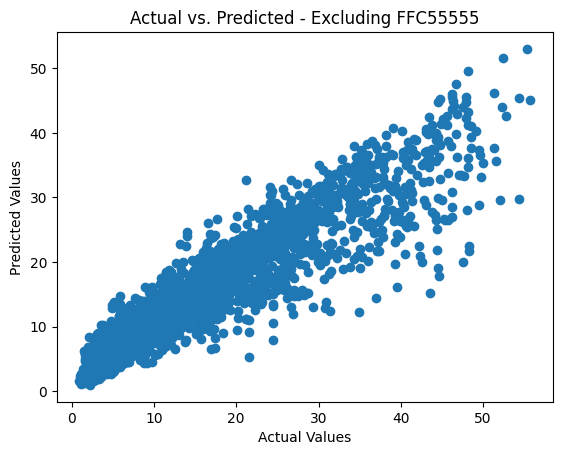

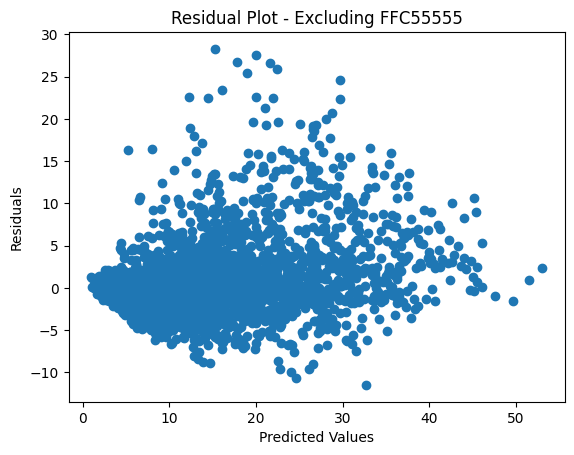

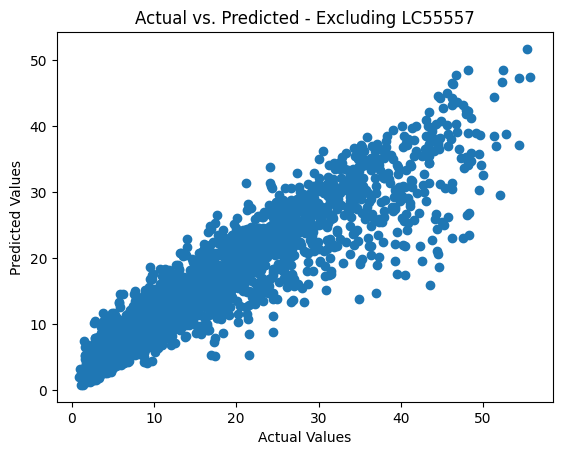

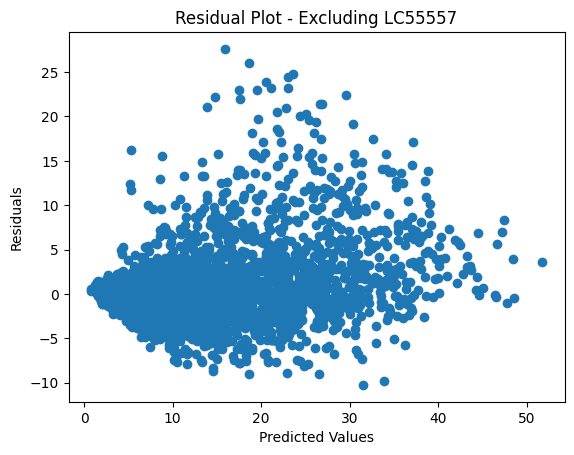

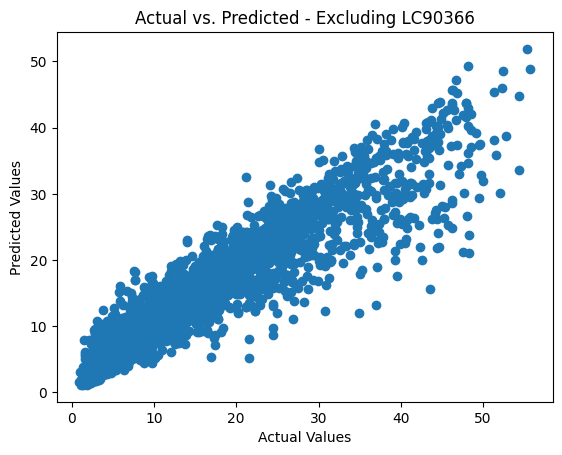

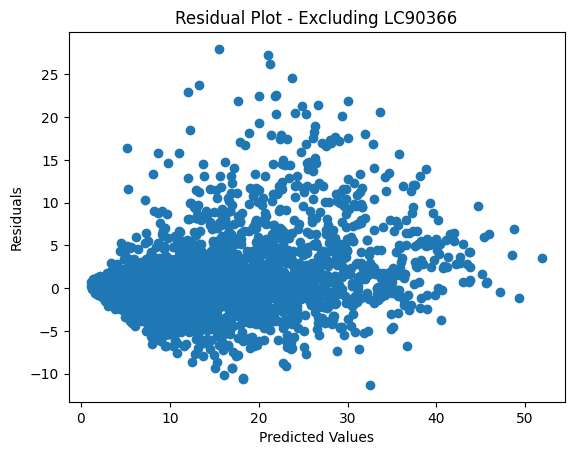

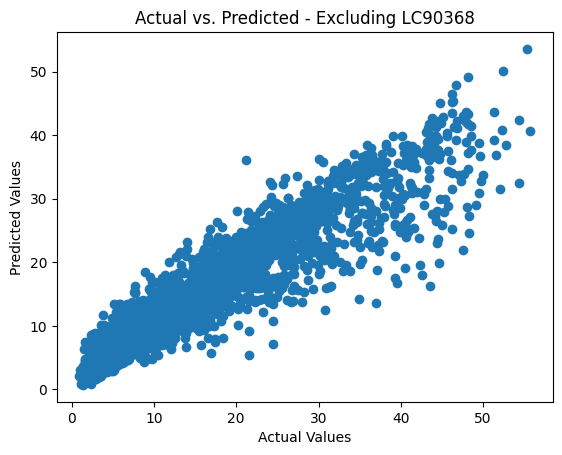

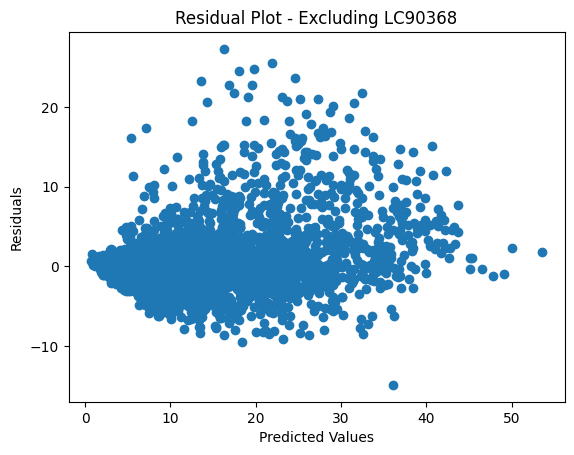

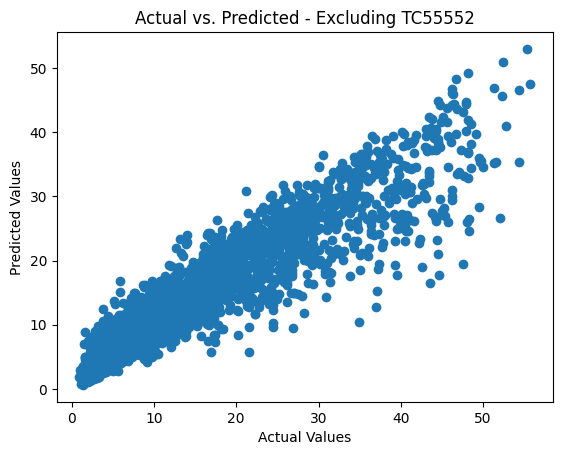

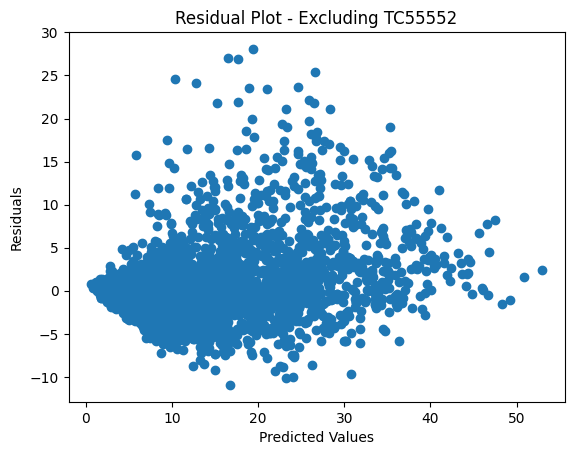

Feature Excluded: 425_pct_Al
MSE Train: 4.490262019878544
RMSE Train: 2.1190238365527048
R2 Train: 0.9426232093885556
MSE Test: 7.914624005379236
RMSE Test: 2.81329415550156
R2 Test: 0.8967073763648457


Feature Excluded: C4_pct_Eth
MSE Train: 4.616647151733605
RMSE Train: 2.148638441370163
R2 Train: 0.9410082539105133
MSE Test: 7.90720186591868
RMSE Test: 2.8119747271123687
R2 Test: 0.8968042416432652


Feature Excluded: C4_pct_H2O
MSE Train: 4.615728380924125
RMSE Train: 2.14842462770378
R2 Train: 0.9410199940094479
MSE Test: 8.020675353272505
RMSE Test: 2.832079686956655
R2 Test: 0.8953233154219007


Feature Excluded: HydWtr_pct_Ammonia
MSE Train: 4.772700253025983
RMSE Train: 2.1846510597864324
R2 Train: 0.939014199648762
MSE Test: 8.082571607205915
RMSE Test: 2.8429863888534386
R2 Test: 0.8945155162822795


Feature Excluded: HydWtr_Na2O
MSE Train: 4.655437967608469
RMSE Train: 2.1576463954059917
R2 Train: 0.9405125829429293
MSE Test: 8.000324387381987
RMSE Test: 2.828484468294282


In [10]:

def feature_iteration_model(df, target_column_name, plot_results=False):
    original_features = df.drop(target_column_name, axis=1).columns
    model_performance = {}

    for feature in original_features:
        X = df.drop([target_column_name, feature], axis=1)
        y = df[target_column_name]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        xgb_model = xgb.XGBRegressor(
            objective ='reg:squarederror', 
            learning_rate=0.03,
            n_estimators=600,
            max_depth=7,
            subsample=0.9,
            colsample_bytree=0.8,
            gamma=2.0,
            alpha=0.2,
            reg_lambda=2,
            colsample_bylevel=0.8,
            colsample_bynode=0.7
        )
        xgb_model.fit(X_train, y_train)

        # Predict and evaluate on training data
        y_train_pred = xgb_model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train, y_train_pred)

        # Predict and evaluate on test data
        y_pred = xgb_model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test, y_pred)

        # Store the metrics
        model_performance[feature] = {
            'MSE Train': mse_train,
            'RMSE Train': rmse_train,
            'R2 Train': r2_train,
            'MSE Test': mse_test,
            'RMSE Test': rmse_test,
            'R2 Test': r2_test
        }

        # Plotting (optional)
        if plot_results:
            plt.scatter(y_test, y_pred)
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.title(f'Actual vs. Predicted - Excluding {feature}')
            plt.show()

            residuals = y_test - y_pred
            plt.scatter(y_pred, residuals)
            plt.xlabel('Predicted Values')
            plt.ylabel('Residuals')
            plt.title(f'Residual Plot - Excluding {feature}')
            plt.show()

    return model_performance

# Assuming your data is in df_All and you want to predict 'Butanol'
performance_without_each_feature = feature_iteration_model(df_All, 'Butanol', plot_results=True)

# Print or analyze the performance dictionary
for feature, metrics in performance_without_each_feature.items():
    print(f"Feature Excluded: {feature}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


In [11]:
# Assuming performance_without_each_feature is your model_performance dictionary
performance_df = pd.DataFrame.from_dict(performance_without_each_feature, orient='index')

print(performance_df) 

                    MSE Train  RMSE Train  R2 Train  MSE Test  RMSE Test  \
425_pct_Al           4.490262    2.119024  0.942623  7.914624   2.813294   
C4_pct_Eth           4.616647    2.148638  0.941008  7.907202   2.811975   
C4_pct_H2O           4.615728    2.148425  0.941020  8.020675   2.832080   
HydWtr_pct_Ammonia   4.772700    2.184651  0.939014  8.082572   2.842986   
HydWtr_Na2O          4.655438    2.157646  0.940513  8.000324   2.828484   
DI55102              4.726553    2.174064  0.939604  8.094491   2.845082   
DI55152              4.486015    2.118022  0.942677  7.820693   2.796550   
FC55003              4.488567    2.118624  0.942645  7.753809   2.784566   
FC55552              4.765165    2.182926  0.939110  8.007992   2.829840   
FC55569              4.496094    2.120400  0.942549  7.797273   2.792360   
FC55576              4.637683    2.153528  0.940739  7.953120   2.820128   
FFC55555             4.577494    2.139508  0.941509  8.032339   2.834138   
LC55557     

In [12]:
performance_df.to_csv('feature_test.csv', index=True)